In [2]:
'''
Video URL - https://www.youtube.com/watch?v=DamIIzp41Jg&list=PLQVvvaa0QuDfSfqQuee6K8opKtZsh7sA9&index=2
'''

'\nVideo URL - https://www.youtube.com/watch?v=DamIIzp41Jg&list=PLQVvvaa0QuDfSfqQuee6K8opKtZsh7sA9&index=2\n'

In [3]:
import pandas as pd

df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


c:\users\sachin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


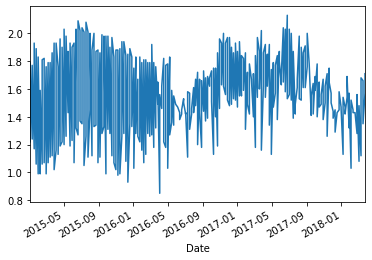

In [10]:
albany_df = df [ df['region'] == 'Albany']

#we do this because as you see the dates above overlap each other - interpreted as string right now
#This has to be done BEFORE you set the index to date. 
albany_df['Date']=pd.to_datetime(albany_df['Date'])

albany_df.set_index('Date', inplace = True)
albany_df['AveragePrice'].plot()

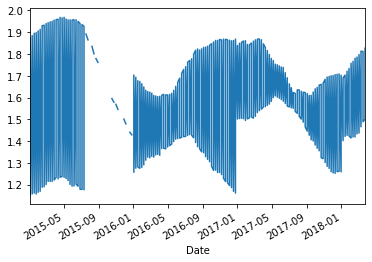

In [11]:
#As you can see the price is very noisy - fluctuates quite a bit. 
#we smooth it out using moving average (rolling(x) function gets you the last 'x' pts), then use a summary func like mean()
albany_df['AveragePrice'].rolling(25).mean().plot()


c:\users\sachin\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:3366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


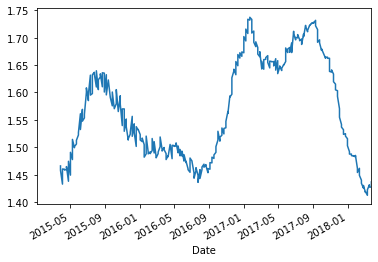

In [12]:
#above occurs because pts are out of order
albany_df['AveragePrice'].sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean().plot()


In [28]:
# albany_df.drop(['level_0'], inplace=True)

#somehow the following step was essential or pandas throws a value error of 'cannot reindex on a duplicate axis'
# this occurs because the data set has dup dates (on each date there are prices for both 'conventional' and 'organic' Type
# of avocados). So I had to reset the index run the following command. Rerunning it though, causes another level(level_0)
# to be added to the dataframe. Had to do the 'drop command above and comment everything out. ' end of day the 'price25ma'
# column remained in the dataset. 

# albany_df.reset_index()

# create a new moving average column to store teh moving average prices - helpful in thefuture. 
# albany_df['price25ma']=albany_df['AveragePrice'].rolling(25).mean()

albany_df.set_index('Date')
albany_df.head()

,level_0,index,Date,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
0,0,0,2015-12-27,0,1.22,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,NaN
1,1,1,2015-12-20,1,1.79,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,NaN
2,2,2,2015-12-13,2,1.24,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,NaN
3,3,3,2015-12-06,3,1.77,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,NaN
4,4,4,2015-11-29,4,1.17,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NaN
